# Mace Head - 2020 Predictions Excluding PM2.5

# Import all the various packages

In [2]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, RobustScaler, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# imports necessary for dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn import svm
from sklearn.decomposition import FastICA
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import FactorAnalysis
# regression algorithms
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.svm import SVR

# metrics for evaluating regression models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error, explained_variance_score, max_error

from time import process_time

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from yellowbrick.regressor import PredictionError

from sklearn.neural_network import MLPRegressor

# Import Data and remove uneccesary columns

In [3]:
df = pd.read_csv('MaceHead_FileforML.csv', thousands=',', low_memory=False)

In [4]:
df['Date'] = df['Date'].astype('datetime64')

In [5]:
df.drop('indrain', axis=1, inplace=True)

In [6]:
df.drop('indtemp', axis=1, inplace=True)

In [7]:
df.drop('indwetb', axis=1, inplace=True)

In [8]:
df.drop('indwdsp', axis=1, inplace=True)

In [9]:
df.drop('indwddir', axis=1, inplace=True)

In [10]:
df.drop('wetb', axis=1, inplace=True)

In [11]:
df.drop('dewpt', axis=1, inplace=True)

In [12]:
df.drop('vappr', axis=1, inplace=True)

In [13]:
df.drop('rhum', axis=1, inplace=True)

In [14]:
df.drop('PM25', axis=1, inplace=True)

In [15]:
#Remove outliers
PMdf = df[(df['PM10'] < 70)]

print('The Number of rows deleted is: {} out of {} original rows'.format((len(df) - len(PMdf)), len(df)))

The Number of rows deleted is: 93 out of 46948 original rows


In [16]:
#Adjust Data
PMdf['Ozone'] = PMdf['Ozone']+1.00
PMdf['rain'] = PMdf['rain']+1.00
PMdf['PM10'] = PMdf['PM10']+1.00
PMdf['wdsp'] = PMdf['wdsp']+1.00
PMdf['temp'] = PMdf['temp']+7.50
PMdf['Hour'] = PMdf['Hour']+1.00
PMdf['wddir'] = PMdf['wddir']/360 + 1.00
PMdf['msl'] = PMdf['msl']/1000

df['Ozone'] = df['Ozone']+1.00
df['rain'] = df['rain']+1.00
df['PM10'] = df['PM10']+1.00
df['wdsp'] = df['wdsp']+1.00
df['temp'] = df['temp']+7.50
df['Hour'] = df['Hour']+1.00
df['wddir'] = df['wddir']/360 + 1.00
df['msl'] = df['msl']/1000

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

In [17]:
# Select time period of data
def YeardfNOPM(Date1, Date2):
    import datetime
    SortedPMdf = PMdf[(PMdf['Date'] > Date1) & (PMdf['Date']< Date2)]
    return SortedPMdf
Year2014PM = YeardfNOPM("2014-03-01", "2015-01-01")
Year2015PM = YeardfNOPM("2015-01-01", "2016-01-01")
Year2016PM = YeardfNOPM("2016-01-01", "2017-01-01")
Year2017PM = YeardfNOPM("2017-01-01", "2018-01-01")
Year2018PM = YeardfNOPM("2018-01-01", "2019-01-01")
Year2019PM = YeardfNOPM("2019-01-01", "2020-01-01")
Year2020PM = YeardfNOPM("2020-01-01", "2021-01-01")
TotalYearsPM = YeardfNOPM("2014-01-01", "2020-01-01")

def Yeardf(Date1, Date2):
    import datetime
    Sorteddf = df[(df['Date'] > Date1) & (df['Date']< Date2)]
    return Sorteddf

Year2014 = Yeardf("2014-03-01", "2015-01-01")
Year2015 = Yeardf("2015-01-01", "2016-01-01")
Year2016 = Yeardf("2016-01-01", "2017-01-01")
Year2017 = Yeardf("2017-01-01", "2018-01-01")
Year2018 = Yeardf("2018-01-01", "2019-01-01")
Year2019 = Yeardf("2019-01-01", "2020-01-01")
Year2020 = Yeardf("2020-01-01", "2021-01-01")
TotalYears = Yeardf("2014-01-01", "2020-01-01")

In [18]:
DYear2014 = Yeardf("2014-03-01", "2015-01-01")
DYear2015 = Yeardf("2015-01-01", "2016-01-01")
DYear2016 = Yeardf("2016-01-01", "2017-01-01")
DYear2017 = Yeardf("2017-01-01", "2018-01-01")
DYear2018 = Yeardf("2018-01-01", "2019-01-01")
DYear2019 = Yeardf("2019-01-01", "2020-01-01")
DYear2020 = Yeardf("2020-01-01", "2021-01-01")
DTotalYears = Yeardf("2014-01-01", "2020-01-01")

# Now drop date prior to input into Algorithms

In [20]:
Year2014.drop('Date', axis=1, inplace=True)
Year2015.drop('Date', axis=1, inplace=True)
Year2016.drop('Date', axis=1, inplace=True)
Year2017.drop('Date', axis=1, inplace=True)
Year2018.drop('Date', axis=1, inplace=True)
Year2019.drop('Date', axis=1, inplace=True)
Year2020.drop('Date', axis=1, inplace=True)
TotalYears.drop('Date', axis=1, inplace=True)

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [21]:
Year2014PM.drop('Date', axis=1, inplace=True)
Year2015PM.drop('Date', axis=1, inplace=True)
Year2016PM.drop('Date', axis=1, inplace=True)
Year2017PM.drop('Date', axis=1, inplace=True)
Year2018PM.drop('Date', axis=1, inplace=True)
Year2019PM.drop('Date', axis=1, inplace=True)
Year2020PM.drop('Date', axis=1, inplace=True)
TotalYearsPM.drop('Date', axis=1, inplace=True)

# Functions which will be called in process of Algorithm work

In [23]:
#Statistical arbiter function for algorithm results
def evaluate_model(X_test, y_test, model):
    
    # compute predictiond for the test set
    _predicted_values = model.predict(X_test)
    # compute metrics
    _mse = mean_squared_error(y_test, _predicted_values)
    _mae = mean_absolute_error(y_test, _predicted_values)
    _r2 = r2_score(y_test, _predicted_values)
    _meae = median_absolute_error(y_test, _predicted_values)
    _evs = explained_variance_score(y_test, _predicted_values)
    _me = max_error(y_test, _predicted_values)      
    return _mse, _mae, _r2, _meae, _evs, _me

In [24]:
#Function to allow algorithms to work
class AddColumnNames(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return pd.DataFrame(data=X, columns=self.columns)

In [25]:
#Function to allow algorithms to work
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        assert isinstance(X, pd.DataFrame)
        return X[self.columns]

# Functions to conduct algorithms

# Random Forest

In [26]:
%%time

def RandomForest(Name, N_Year, N, printCV, printgraph, N_Features, Max_Depth, ratio, PM):
    
    Data = N_Year
    
    names_all = [c for c in Data if c not in ['PM10']]

    # define column groups with the same data preparation
    names_outliers = ['wdsp','temp','rain','Ozone','Hour','wddir','msl']
    names_no_outliers = list(set(names_all) - set(names_outliers))
    
    y = Data['PM10']
    X = Data.drop('PM10', axis=1).values
    y_test = Year2020['PM10']
    X_test = Year2020.drop('PM10', axis=1).values
    
    preprocess_pipeline = make_pipeline(
    AddColumnNames(columns=names_all),
    FeatureUnion(transformer_list=[
        ("outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()
        )),
        ("no_outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()  
        ))
    ])
)
   
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, shuffle=True)
    X_train, y_train = X, y
    
    pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), 
                       ('reduce_dim', 'passthrough'),
                        ('regresson', RandomForestRegressor(n_estimators=100))])

    
    #print(len(Data))
    
    
    N_FEATURES_OPTIONS = [N_Features]
    MAX_DEPTH_OPTIONS = [Max_Depth]

    param_grid = [
        {
            'reduce_dim': [PCA(iterated_power=7)],
            'reduce_dim__n_components': N_FEATURES_OPTIONS,
            'regresson__max_depth': MAX_DEPTH_OPTIONS
        },
        {
            'reduce_dim': [RFE(svm.SVR(kernel='linear', gamma='auto')),RFE(LinearRegression())],
            'reduce_dim__n_features_to_select': N_FEATURES_OPTIONS,
            'regresson__max_depth': MAX_DEPTH_OPTIONS
        },
        {
            'reduce_dim': [FastICA( algorithm='deflation')],
            'reduce_dim__n_components': N_FEATURES_OPTIONS,
            'regresson__max_depth': MAX_DEPTH_OPTIONS
        },
        {
            'reduce_dim': [TruncatedSVD(algorithm='randomized'), TruncatedSVD(algorithm='arpack')],
            'reduce_dim__n_components': N_FEATURES_OPTIONS
        },
    ]    

    search = GridSearchCV(pipe, param_grid, cv=10, iid = False, refit=True)
    search.fit(X_train, y_train)

    if printCV == 0:
        print("Best CV score = %0.3f:" % search.best_score_)
        print("Best parameters: ", search.best_params_)
    
        
 
    # store the best params and best model for later use
    RF_best_params = search.best_params_
    RF_best_model = search.best_estimator_
    
    if printgraph == 0:
        model = RandomForestRegressor()
        visualizer = PredictionError(model)

        visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        visualizer.show()                 # Finalize and render the figure
    
    RF_mse, RF_mae, RF_r2, RF_meae, RF_evs, RF_me = evaluate_model(X_test, y_test, RF_best_model)
    
    Title = np.array([Name])
    Range = np.array([N])
    Features = np.array([N_Features])
    Depth = np.array([Max_Depth])
    Split = np.array([ratio])
    PM_70 = np.array([PM])
    MSE  = np.array([RF_mse])
    MAE  = np.array([RF_mae])
    R2   = np.array([RF_r2])
    MEAE = np.array([RF_meae])
    ME   = np.array([RF_me])
    
    Predictions = model.predict(X_test)
    df = pd.DataFrame(list(zip(Title, Range, Features, Depth, Split, PM_70, MSE, MAE, R2, MEAE, ME)), columns =['Algorithm', 'Year', 'N Features', 'Max Depth', 'Test-Train Split', 'PM10 > 70 Removed', 'MSE', 'MAE', 'R2', 'MEAE', 'ME'])
    
    return df, Predictions


Wall time: 0 ns


# Gradient Boosting

In [27]:
%%time
def GradientBoosting(Name, N_Year, N, printCV, printgraph, N_Features, Max_Depth, ratio, PM):
    Data = N_Year
    
    names_all = [c for c in Data if c not in ['PM10']]

    # define column groups with the same data preparation
    names_outliers = ['wdsp','temp','rain','Ozone','Hour','wddir','msl']
    names_no_outliers = list(set(names_all) - set(names_outliers))
    
    y = Data['PM10']
    X = Data.drop('PM10', axis=1).values
    y_test = Year2020['PM10']
    X_test = Year2020.drop('PM10', axis=1).values
    
    preprocess_pipeline = make_pipeline(
    AddColumnNames(columns=names_all),
    FeatureUnion(transformer_list=[
        ("outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()
        )),
        ("no_outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()  
        ))
    ])
)
   
    X_train, y_train = X, y
    
    pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), 
                           ('reduce_dim', 'passthrough'),
                           ('regresson', GradientBoostingRegressor())])



    N_FEATURES_OPTIONS = [N_Features]
    MAX_DEPTH_OPTIONS = [Max_Depth]


    param_grid = [
         {
            'reduce_dim': [TruncatedSVD(algorithm='randomized'), TruncatedSVD(algorithm='arpack')],
            'reduce_dim__n_components': N_FEATURES_OPTIONS
        },
        {
            'reduce_dim': [FactorAnalysis(svd_method='randomized'), FactorAnalysis(svd_method='lapack')],
            'reduce_dim__n_components': N_FEATURES_OPTIONS
        },
        {
            'reduce_dim': [PCA(iterated_power=7)],
            'reduce_dim__n_components': N_FEATURES_OPTIONS,
            'regresson__max_depth': MAX_DEPTH_OPTIONS
        },
        {
            'reduce_dim': [RFE(svm.SVR(kernel='linear', gamma='auto')),RFE(LinearRegression())],
            'reduce_dim__n_features_to_select': N_FEATURES_OPTIONS,
            'regresson__max_depth': MAX_DEPTH_OPTIONS
        }


    ]
    search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=10, iid=False, refit=True)
    search.fit(X_train, y_train)
    
    if printCV == 0:
        print("Best CV score = %0.3f:" % search.best_score_)
        print("Best parameters: ", search.best_params_)

    # store the best params and best model for later use
    GB_best_params = search.best_params_
    GB_best_model = search.best_estimator_
    
    if printgraph == 0:
        model = GradientBoostingRegressor()
        visualizer = PredictionError(model)

        visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        visualizer.show()                 # Finalize and render the figure

    GB_mse, GB_mae, GB_r2, GB_meae, GB_evs, GB_me = evaluate_model(X_test, y_test, GB_best_model)
    
    Title = np.array([Name])
    Range = np.array([N])
    Features = np.array([N_Features])
    Depth = np.array([Max_Depth])
    Split = np.array([ratio])
    PM_70 = np.array([PM])
    MSE  = np.array([GB_mse])
    MAE  = np.array([GB_mae])
    R2   = np.array([GB_r2])
    MEAE = np.array([GB_meae])
    ME   = np.array([GB_me])
    
    Predictions = model.predict(X_test)
    df = pd.DataFrame(list(zip(Title, Range, Features, Depth, Split, PM_70, MSE, MAE, R2, MEAE, ME)), columns =['Algorithm', 'Year', 'N Features', 'Max Depth', 'Test-Train Split', 'PM10 > 70 Removed', 'MSE', 'MAE', 'R2', 'MEAE', 'ME'])
    
    return df, Predictions
    

Wall time: 0 ns


# ANN

In [28]:
%%time
def ANN(Name, N_Year, N, printCV, printgraph, N_Features, ratio, PM):
    Data = N_Year
    
    names_all = [c for c in Data if c not in ['PM10']]

    # define column groups with the same data preparation
    names_outliers = ['wdsp','temp','rain','Ozone','Hour','wddir','msl']
    names_no_outliers = list(set(names_all) - set(names_outliers))
    
    y = Data['PM10']
    X = Data.drop('PM10', axis=1).values
    y_test = Year2020['PM10']
    X_test = Year2020.drop('PM10', axis=1).values
    
    preprocess_pipeline = make_pipeline(
    AddColumnNames(columns=names_all),
    FeatureUnion(transformer_list=[
        ("outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()
        )),
        ("no_outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()  
        ))
    ])
)
   
    X_train, y_train = X, y
    
    pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), 
                       ('reduce_dim', 'passthrough'),
                       ('regresson', MLPRegressor ())])



    ALPHA = [0.001, 0.01, 0.1, 1, 10, 100], 
    HIDDEN_LAYER_SIZES = [(6),(11,11),(7,7,7)] 
    SOLVER = ['adam'] 
    ACTIVATION = ['relu','tanh','identity','logistic'] 
    LEARNING_RATE = ['constant','invscaling','adaptive']
    N_FEATURES_OPTIONS = [N_Features]
    MAX_ITER = [500]

    param_grid = [
         {
            'reduce_dim': [TruncatedSVD(algorithm='randomized'), TruncatedSVD(algorithm='arpack')],
            'reduce_dim__n_components': N_FEATURES_OPTIONS
        },
        {
            'reduce_dim': [FactorAnalysis(svd_method='randomized'), FactorAnalysis(svd_method='lapack')],
            'reduce_dim__n_components': N_FEATURES_OPTIONS
        },

    ]
    search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=10, iid=False, refit=True)
    search.fit(X_train, y_train)
    

    if printCV == 0:
        print("Best CV score = %0.3f:" % search.best_score_)
        print("Best parameters: ", search.best_params_)

     # store the best params and best model for later use
    MLP_best_params = search.best_params_
    MLP_best_model = search.best_estimator_
    
    if printgraph == 0:
        model = MLPRegressor()
        visualizer = PredictionError(model)

        visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        visualizer.show()                 # Finalize and render the figure

    MLP_mse, MLP_mae, MLP_r2, MLP_meae, MLP_evs, MLP_me = evaluate_model(X_test, y_test, MLP_best_model)
    
    Title = np.array([Name])
    Range = np.array([N])
    Features = np.array([N_Features])
    #Depth = np.array([Max_Depth])
    Split = np.array([ratio])
    PM_70 = np.array([PM])
    MSE  = np.array([MLP_mse])
    MAE  = np.array([MLP_mae])
    R2   = np.array([MLP_r2])
    MEAE = np.array([MLP_meae])
    ME   = np.array([MLP_me])
    
    Predictions = model.predict(X_test)
    df = pd.DataFrame(list(zip(Title, Range, Features, Split, PM_70, MSE, MAE, R2, MEAE, ME)), columns =['Algorithm', 'Year', 'N Features', 'Test-Train Split', 'PM10 > 70 Removed', 'MSE', 'MAE', 'R2', 'MEAE', 'ME'])
    
    return df, Predictions
    

Wall time: 0 ns


# Linear Regression

In [29]:
%%time
def LRegress(Name, N_Year, N, printCV, printgraph, N_Features, ratio, PM):
    Data = N_Year
    
    names_all = [c for c in Data if c not in ['PM10']]

    # define column groups with the same data preparation
    names_outliers = ['wdsp','temp','rain','Ozone','Hour','wddir','msl']
    names_no_outliers = list(set(names_all) - set(names_outliers))
    
    y = Data['PM10']
    X = Data.drop('PM10', axis=1).values
    y_test = Year2020['PM10']
    X_test = Year2020.drop('PM10', axis=1).values
    
    preprocess_pipeline = make_pipeline(
    AddColumnNames(columns=names_all),
    FeatureUnion(transformer_list=[
        ("outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()
        )),
        ("no_outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()  
        ))
    ])
    )
   
    X_train, y_train = X, y
    
    pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), 
                       ('reduce_dim', 'passthrough'),
                       ('regresson', LinearRegression())])



    N_FEATURES_OPTIONS = [N_Features]
    NORMALIZE_OPTIONS = [False, True]

    param_grid = [
    {
        'reduce_dim': [PCA(iterated_power=7)],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'regresson__normalize': NORMALIZE_OPTIONS
    },
    {
        'reduce_dim': [RFE(svm.SVR(kernel='linear', gamma='auto')),RFE(LinearRegression())],
        'reduce_dim__n_features_to_select': N_FEATURES_OPTIONS,
        'regresson__normalize': NORMALIZE_OPTIONS
    },
    {
        'reduce_dim': [FastICA( algorithm='deflation')],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'regresson__normalize': NORMALIZE_OPTIONS
    },
    {
        'reduce_dim': [TruncatedSVD(algorithm='randomized'), TruncatedSVD(algorithm='arpack')],
        'reduce_dim__n_components': N_FEATURES_OPTIONS
    }
]

    search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=10, iid=False, refit=True)
    search.fit(X_train, y_train)


    if printCV == 0:
        print("Best CV score = %0.3f:" % search.best_score_)
        print("Best parameters: ", search.best_params_)

     # store the best params and best model for later use
    LR_best_params = search.best_params_
    LR_best_model = search.best_estimator_
    
    if printgraph == 0:
        model = LinearRegression()
        visualizer = PredictionError(model)

        visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        visualizer.show()                 # Finalize and render the figure

    LR_mse, LR_mae, LR_r2, LR_meae, LR_evs, LR_me = evaluate_model(X_test, y_test, LR_best_model)
    
    Title = np.array([Name])
    Range = np.array([N])
    Features = np.array([N_Features])
    #Depth = np.array([Max_Depth])
    Split = np.array([ratio])
    PM_70 = np.array([PM])
    MSE  = np.array([LR_mse])
    MAE  = np.array([LR_mae])
    R2   = np.array([LR_r2])
    MEAE = np.array([LR_meae])
    ME   = np.array([LR_me])
    
    Predictions = model.predict(X_test)
    df = pd.DataFrame(list(zip(Title, Range, Features, Split, PM_70, MSE, MAE, R2, MEAE, ME)), columns =['Algorithm', 'Year', 'N Features', 'Test-Train Split', 'PM10 > 70 Removed', 'MSE', 'MAE', 'R2', 'MEAE', 'ME'])
    
    return df, Predictions

Wall time: 0 ns


# SVM

In [30]:
%%time
def SVM(Name, N_Year, N, printCV, printgraph, N_Features, ratio, PM):
    Data = N_Year
    
    names_all = [c for c in Data if c not in ['PM10']]

    # define column groups with the same data preparation
    names_outliers = ['wdsp','temp','rain','Ozone','Hour','wddir','msl']
    names_no_outliers = list(set(names_all) - set(names_outliers))
    
    y = Data['PM10']
    X = Data.drop('PM10', axis=1).values
    y_test = Year2020['PM10']
    X_test = Year2020.drop('PM10', axis=1).values
    
    preprocess_pipeline = make_pipeline(
    AddColumnNames(columns=names_all),
    FeatureUnion(transformer_list=[
        ("outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()
        )),
        ("no_outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()  
        ))
    ])
)
   
    X_train, y_train = X, y
    
    pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), 
                       ('reduce_dim', 'passthrough'),
                       ('regresson', SVR())])



    KERNEL = ['linear']
    C = [300]
    GAMMA = ['auto']
    N_FEATURES_OPTIONS = [N_Features]


    param_grid = [
         {
            'reduce_dim': [TruncatedSVD(algorithm='randomized'), TruncatedSVD(algorithm='arpack')],
            'reduce_dim__n_components': N_FEATURES_OPTIONS
        },
        {
            'reduce_dim': [FactorAnalysis(svd_method='randomized'), FactorAnalysis(svd_method='lapack')],
            'reduce_dim__n_components': N_FEATURES_OPTIONS
        }
    ]
    
    search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=10, iid=False, refit=True)
    search.fit(X_train, y_train)
    

    
    if printCV == 0:
        print("Best CV score = %0.3f:" % search.best_score_)
        print("Best parameters: ", search.best_params_)

     # store the best params and best model for later use
    SVR_best_params = search.best_params_
    SVR_best_model = search.best_estimator_
    
    if printgraph == 0:
        model = SVR()
        visualizer = PredictionError(model)

        visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        visualizer.show()                 # Finalize and render the figure

    SVR_mse, SVR_mae, SVR_r2, SVR_meae, SVR_evs, SVR_me = evaluate_model(X_test, y_test, SVR_best_model)
    
    Title = np.array([Name])
    Range = np.array([N])
    Features = np.array([N_Features])
    #Depth = np.array([Max_Depth])
    Split = np.array([ratio])
    PM_70 = np.array([PM])
    MSE  = np.array([SVR_mse])
    MAE  = np.array([SVR_mae])
    R2   = np.array([SVR_r2])
    MEAE = np.array([SVR_meae])
    ME   = np.array([SVR_me])
    
    Predictions = model.predict(X_test)
    df = pd.DataFrame(list(zip(Title, Range, Features, Split, PM_70, MSE, MAE, R2, MEAE, ME)), columns =['Algorithm', 'Year', 'N Features', 'Test-Train Split', 'PM10 > 70 Removed', 'MSE', 'MAE', 'R2', 'MEAE', 'ME'])
    
    return df, Predictions

Wall time: 0 ns


# Conduct the Algorithms

Best CV score = 0.243:
Best parameters:  {'reduce_dim': RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=7, step=1, verbose=0), 'reduce_dim__n_features_to_select': 7, 'regresson__max_depth': 12}


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


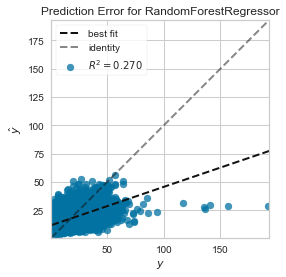

Wall time: 48min 22s


In [31]:
%%time
RFStatPM, RFPredPM = RandomForest('Random Forest', TotalYearsPM, '2020 Prediction', 0, 0, 7, 12, 0.3, 'YES')

Best CV score = 0.243:
Best parameters:  {'reduce_dim': FastICA(algorithm='deflation', fun='logcosh', fun_args=None, max_iter=200,
        n_components=7, random_state=None, tol=0.0001, w_init=None,
        whiten=True), 'reduce_dim__n_components': 7, 'regresson__max_depth': 12}


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


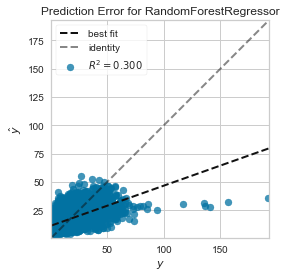

Wall time: 45min 1s


In [32]:
%%time
GBStatPM, GBPredPM = RandomForest('Gradient Boosting', TotalYearsPM, '2020 Prediction', 0, 0, 7, 12, 0.3, 'YES')

C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Best CV score = 0.273:
Best parameters:  {'reduce_dim': FactorAnalysis(copy=True, iterated_power=3, max_iter=1000, n_components=7,
               noise_variance_init=None, random_state=0,
               svd_method='randomized', tol=0.01), 'reduce_dim__n_components': 7}


C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


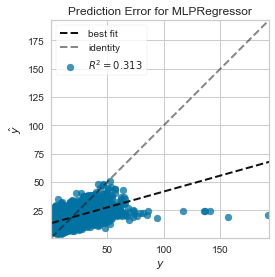

Wall time: 4min 41s


In [33]:
%%time
MLPStatPM, MLPPredPM = ANN('ANN', TotalYearsPM, '2020 Prediction', 0, 0, 7, 0.3, 'YES')

Best CV score = 0.159:
Best parameters:  {'reduce_dim': PCA(copy=True, iterated_power=7, n_components=7, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), 'reduce_dim__n_components': 7, 'regresson__normalize': True}


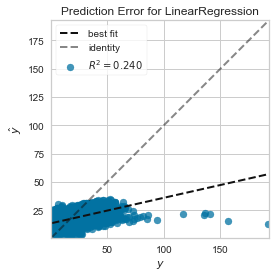

Wall time: 43min 28s


In [34]:
%%time
LRStatPM, LRPredPM = LRegress('Linear Regression', TotalYearsPM, '2020 Prediction', 0, 0, 7, 0.3, 'YES')

C:\Users\User\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Best CV score = 0.245:
Best parameters:  {'reduce_dim': TruncatedSVD(algorithm='arpack', n_components=7, n_iter=5, random_state=None,
             tol=0.0), 'reduce_dim__n_components': 7}


C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


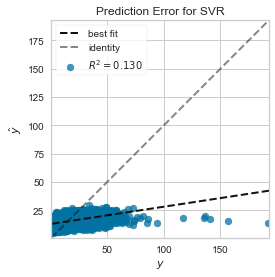

Wall time: 12min 2s


In [35]:
%%time
SVMStatPM, SVMPredPM = SVM('SVM', TotalYearsPM, '2020 Prediction', 0, 0, 7, 0.3, 'YES')

# Function to plot a Time Series of the Predictions and the Actual data

In [36]:
from matplotlib.pyplot import figure

def PredictionPlot(Name, Data1, Data2):
    
    PM10Act = []
    PM10Act = Data2['PM10'].values

    Date = []
    Date = Data2['Date'].values

    N_data = len(Data1)
    N = np.zeros(N_data)

    for i in range(N_data):
        N[i] = i
        
    
    Plotsdf = pd.DataFrame(list(zip(Date, Data1, PM10Act)), columns=['Date', 'PM10_Predicted_Values', 'PM10_Actual_Values'])
    
    Plotsdf['PM10 Actual'] = Plotsdf.PM10_Actual_Values.rolling(5, min_periods=0).mean()
    Plotsdf['PM10 Prediction'] = Plotsdf.PM10_Predicted_Values.rolling(5, min_periods=0).mean()
    #print(len(PM10))
    #print(len(N))

    figure(figsize=(25, 10))
    
    
    Plotsdf.plot(x='Date', y=["PM10 Prediction", "PM10 Actual"], linewidth=0.7, figsize=(25, 10), color=['red', 'blue'])
    plt.title("Graph of 5 Point Moving Average of Predicted and actual PM10 values for {}".format(Name), fontsize=30)
    plt.xlabel("Date", fontsize=30)
    plt.xticks(rotation=45)
    plt.tick_params(labelsize = 20)
    plt.ylabel("Value ($\mu g / m^{3}$)", fontsize=30)
    plt.legend(fontsize=20)
    plt.show()

    Plotsdf.plot(x='Date', y=["PM10_Predicted_Values", "PM10_Actual_Values"], linewidth=0.7, figsize=(25, 10), color=['red', 'blue'])
    plt.title("Graph of Predicted and actual PM10 values for {}".format(Name), fontsize=30)
    plt.xlabel("Date", fontsize=30)
    plt.ylabel("Value ($\mu g / m^{3}$)", fontsize=30)
    plt.legend(fontsize=20)
    
    plt.show() 

# Function to plot the Difference between the Predictions and Actual Data

In [37]:
from matplotlib.pyplot import figure
import matplotlib.dates as mdates

def DiffPredictionPlot(Name, Data1, Data2):
    PM10Act = []
    PM10Act = Data2['PM10'].values

    Date = []
    Date = Data2['Date'].values

    N_data = len(Data1)
    N = np.zeros(N_data)

    for i in range(N_data):
        N[i] = abs(Data1[i] - PM10Act[i])

    #print(len(PM10))
    #print(len(N))
    Diffdf = pd.DataFrame(list(zip(N)), columns=['Difference'])
    
    Diffdf['SMA_5'] = Diffdf.Difference.rolling(5, min_periods=0).mean()
    
    DiffSMA = []
    DiffSMA = Diffdf['SMA_5'].values
    
    average = np.zeros(int(len(DiffSMA)/5))
    
    
    Plotdf = pd.DataFrame(list(zip(Date, N, DiffSMA)), columns=['Date', 'PM10 Value Difference', 'SMA_5'])
   
    
    figure(figsize=(25, 10))
    Plotdf.plot('Date', 'PM10 Value Difference', linewidth=0.7, figsize=(25, 10))
    plt.title("Graph of the difference between Predicted and Actual PM10 Values for {}".format(Name), fontsize=30)
    plt.xlabel("Date", fontsize=30)
    plt.xticks(rotation=45)
    plt.tick_params(labelsize = 20)
    plt.ylabel("Value ($\mu g / m^{3}$)", fontsize=30)
    plt.legend(fontsize=20)
    plt.show()
    
    Plotdf.plot('Date', 'SMA_5', linewidth=0.7, figsize=(25, 10))
    plt.title("Graph of 5-Point moving average of the difference between Predicted and Actual PM10 Values for {}".format(Name), fontsize=30)
    plt.xlabel("Date", fontsize=30)
    plt.xticks(rotation=45)
    plt.tick_params(labelsize = 20)
    plt.ylabel("Value ($\mu g / m^{3}$)", fontsize=30)
    plt.legend(fontsize=20)
    plt.show()
    
    
    max_diff = np.array([max(N)])
    min_diff = np.array([min(N)])
    Title  = np.array([Name])
    
    
    df = pd.DataFrame(list(zip(Title, max_diff, min_diff)), columns =['Algorithm', 'Max Difference', 'Min Difference'])
    
    
    return df


# Run Plotting functions for the results of the various Algorithms

<Figure size 1800x720 with 0 Axes>

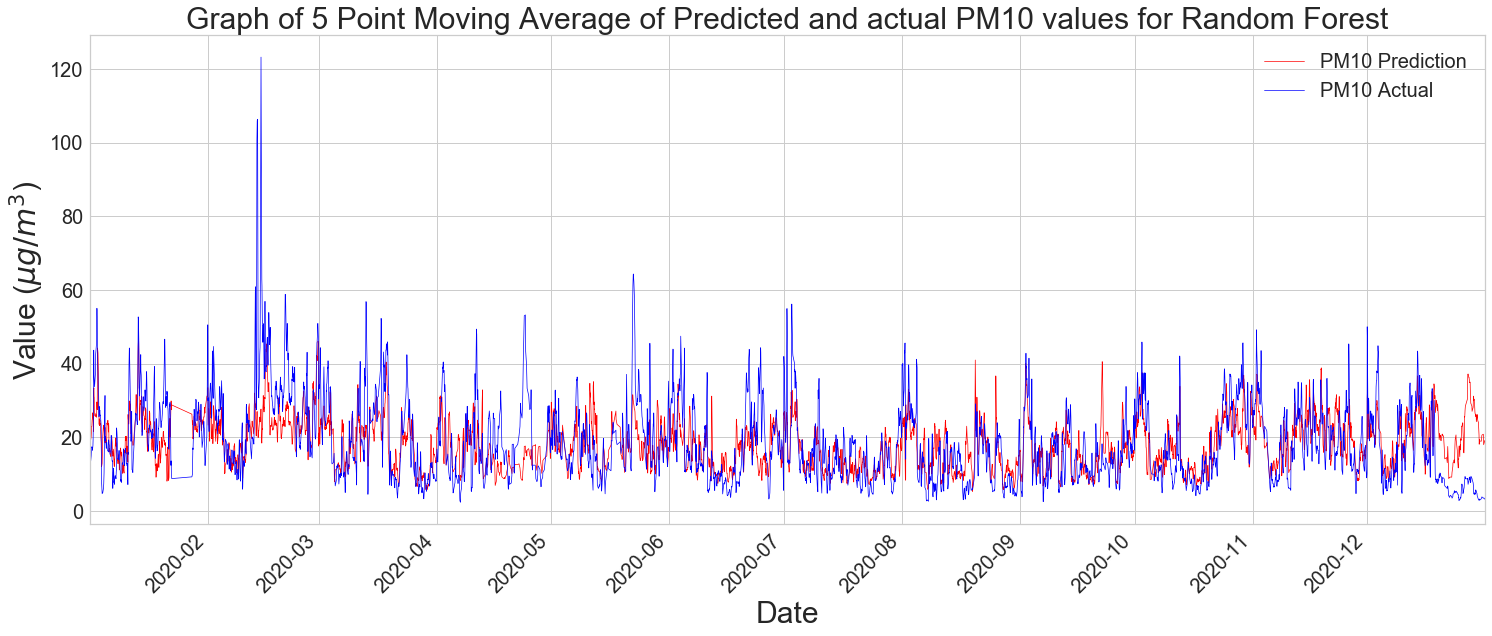

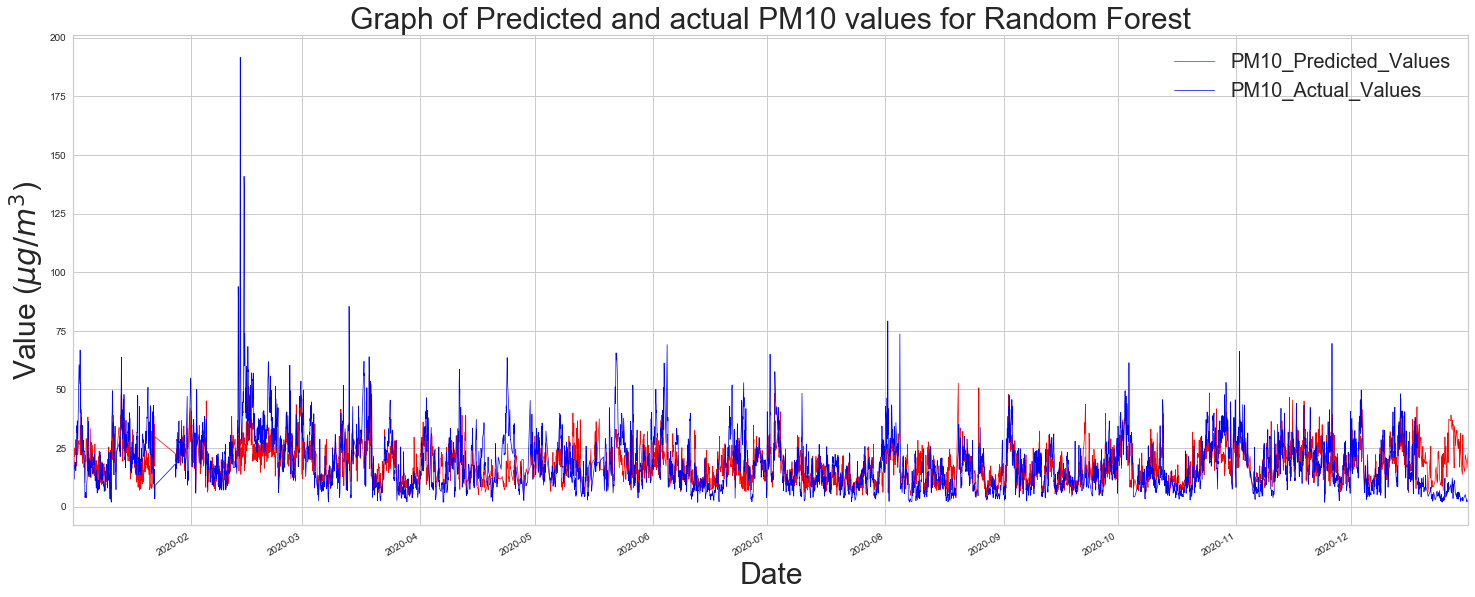

<Figure size 1800x720 with 0 Axes>

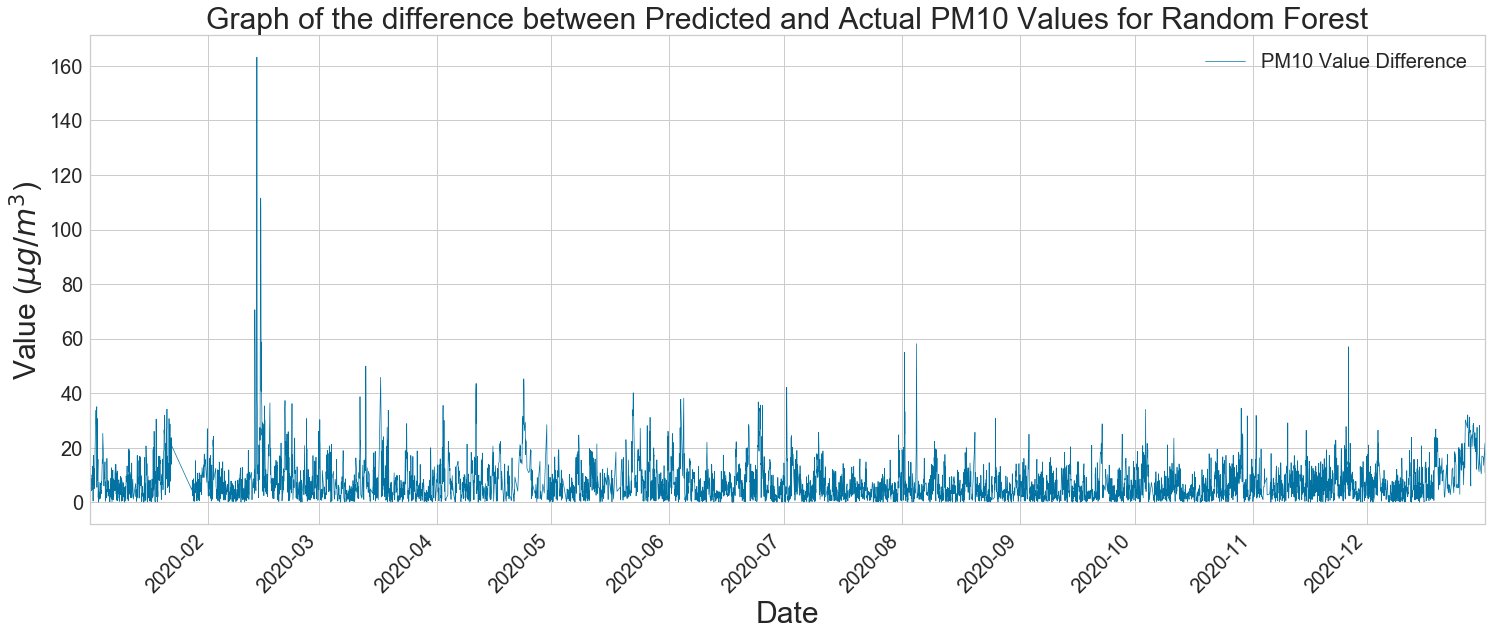

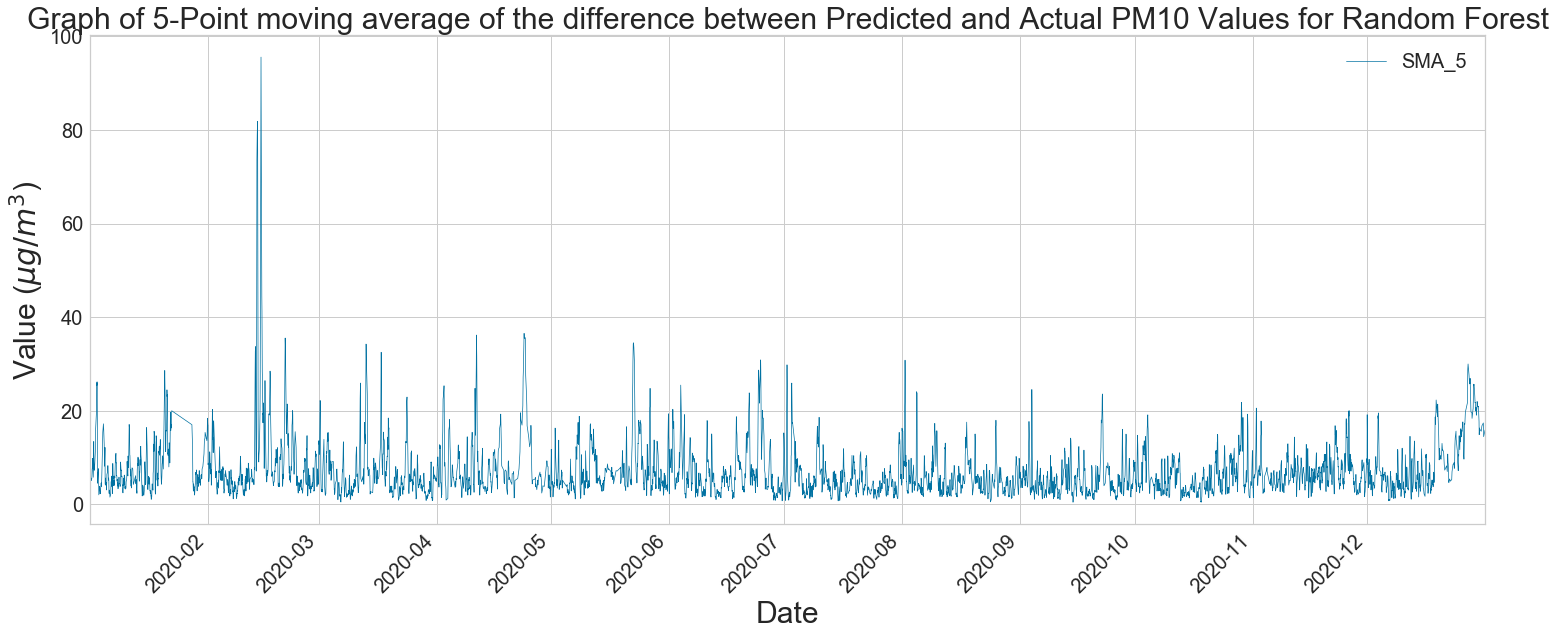

In [38]:
PredictionPlot('Random Forest', RFPredPM, DYear2020)
RFDiff = DiffPredictionPlot('Random Forest', RFPredPM, DYear2020)

<Figure size 1800x720 with 0 Axes>

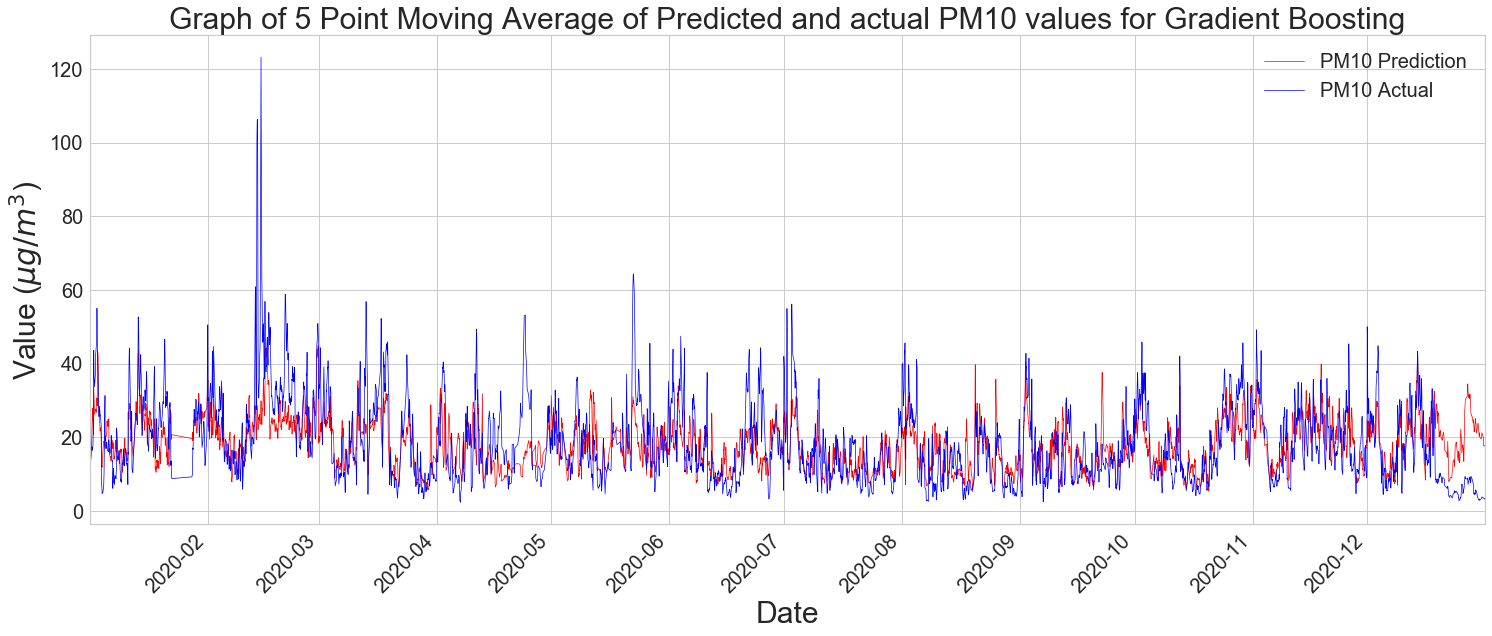

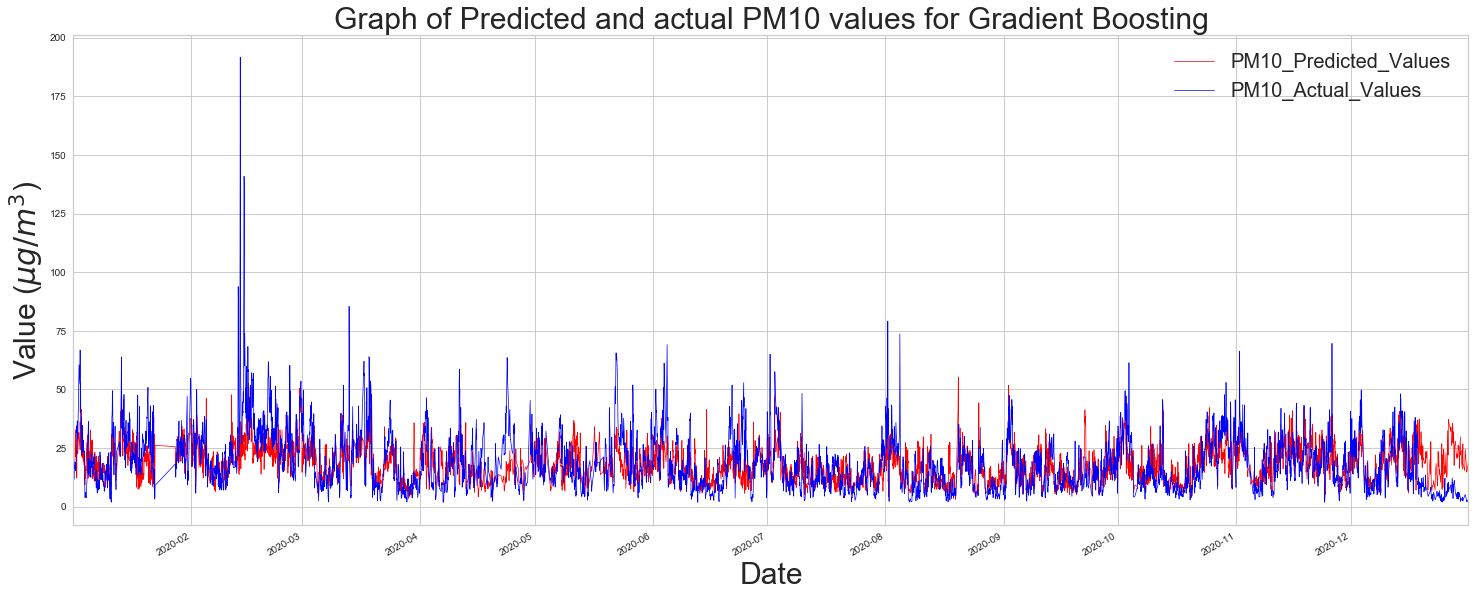

<Figure size 1800x720 with 0 Axes>

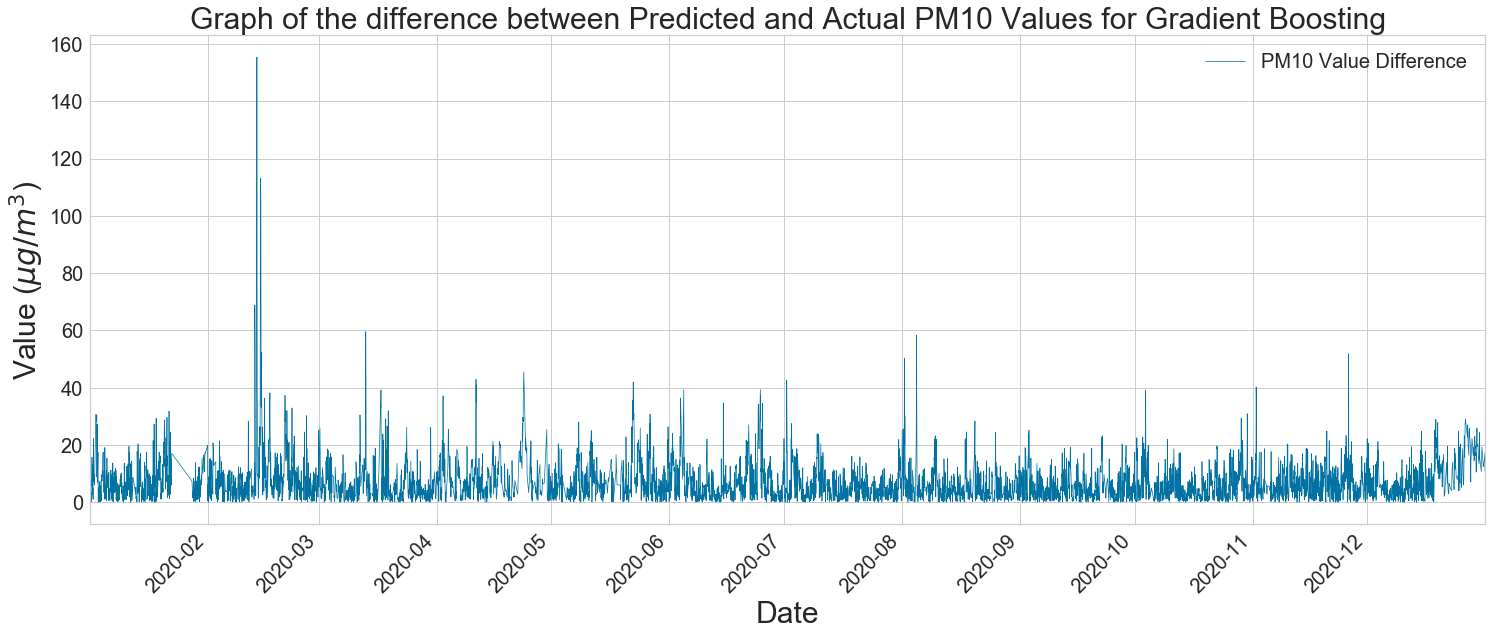

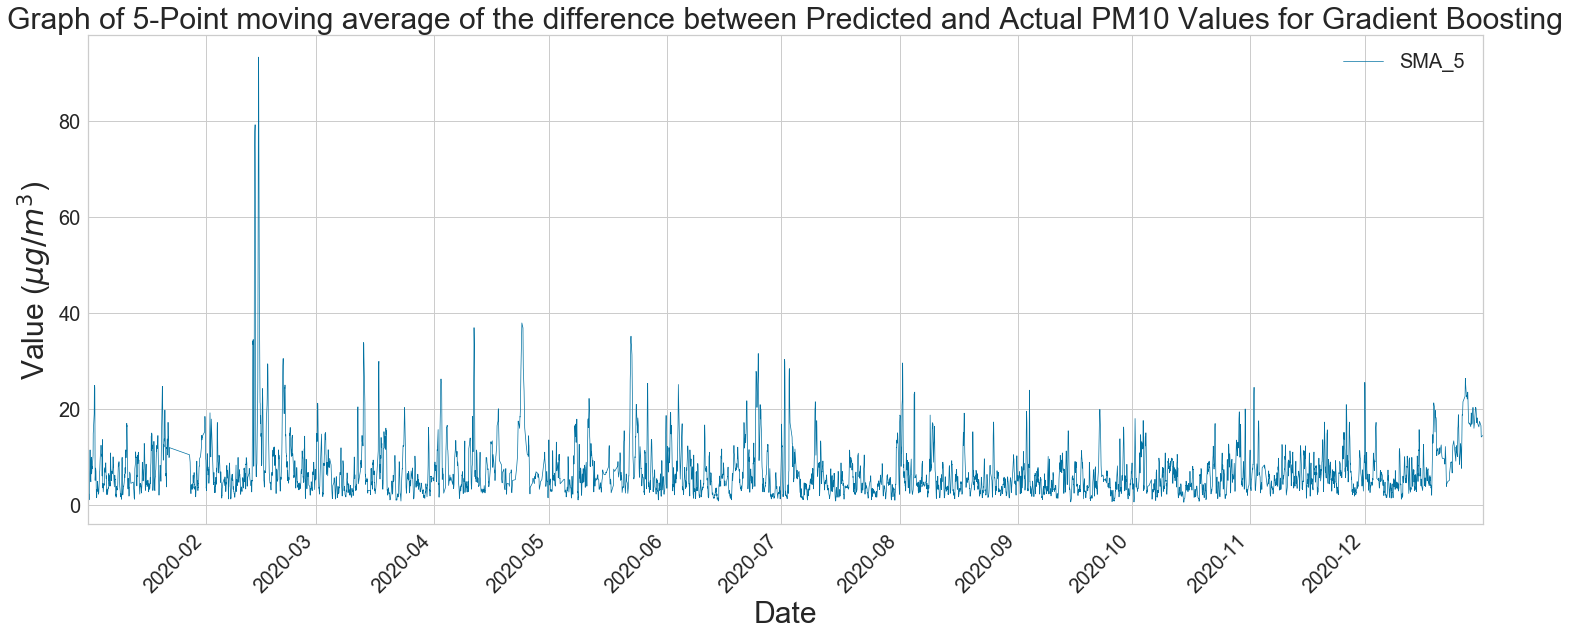

In [39]:
PredictionPlot('Gradient Boosting', GBPredPM, DYear2020)
GBDiff = DiffPredictionPlot('Gradient Boosting', GBPredPM, DYear2020)

<Figure size 1800x720 with 0 Axes>

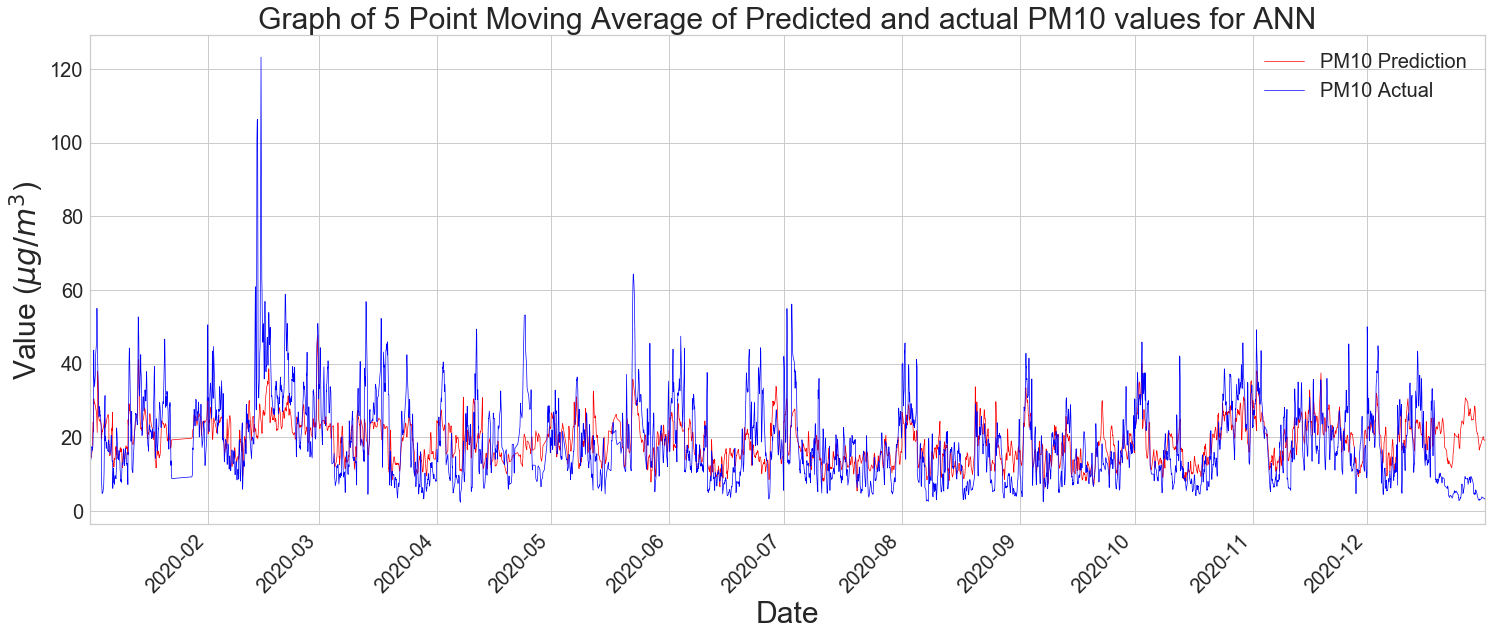

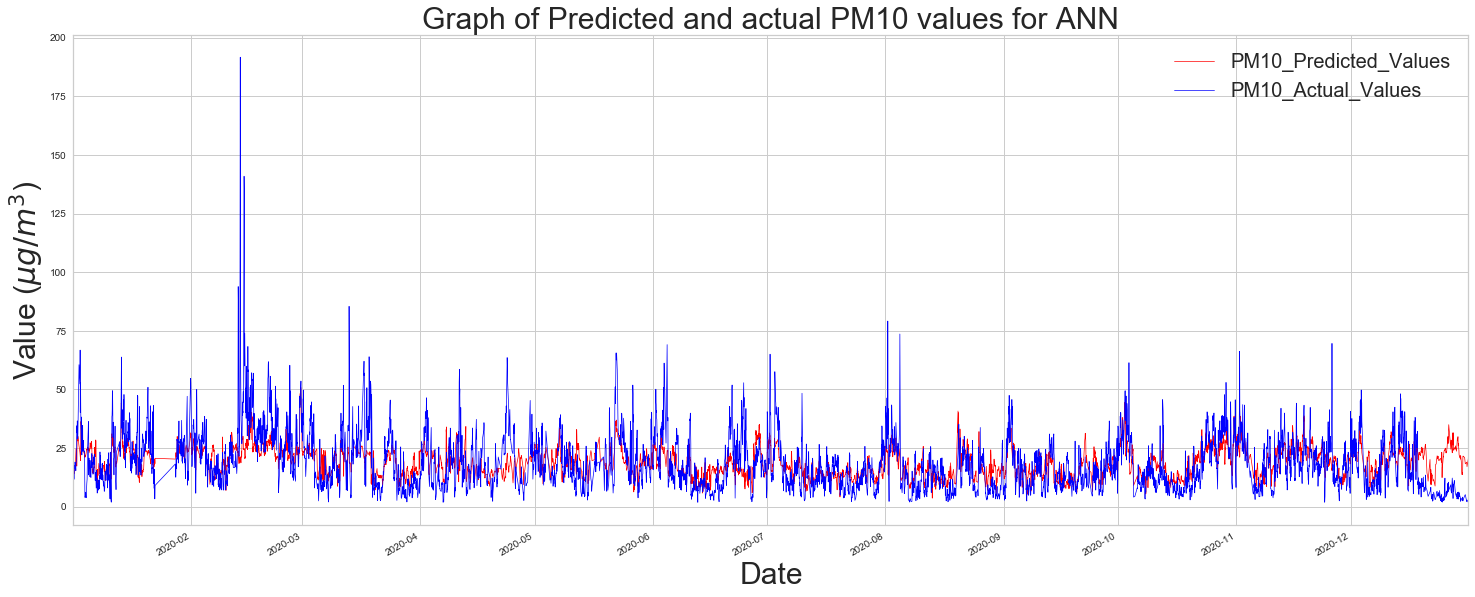

<Figure size 1800x720 with 0 Axes>

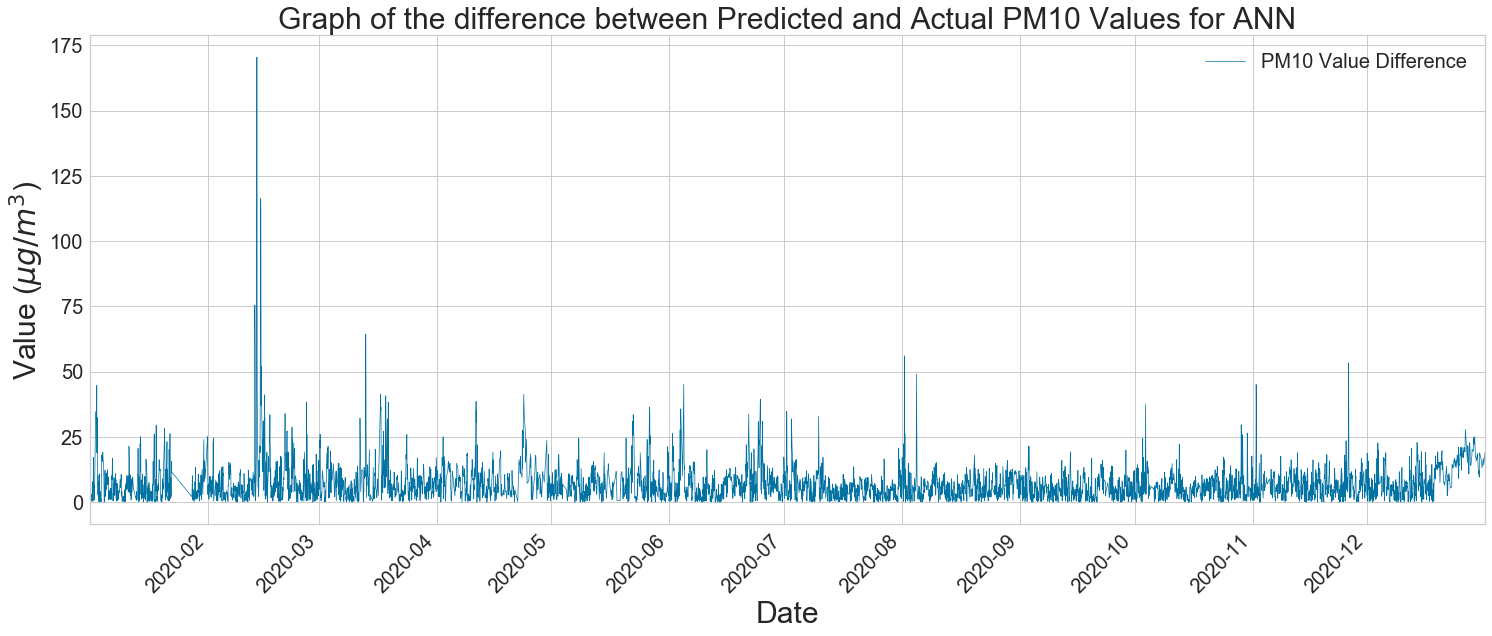

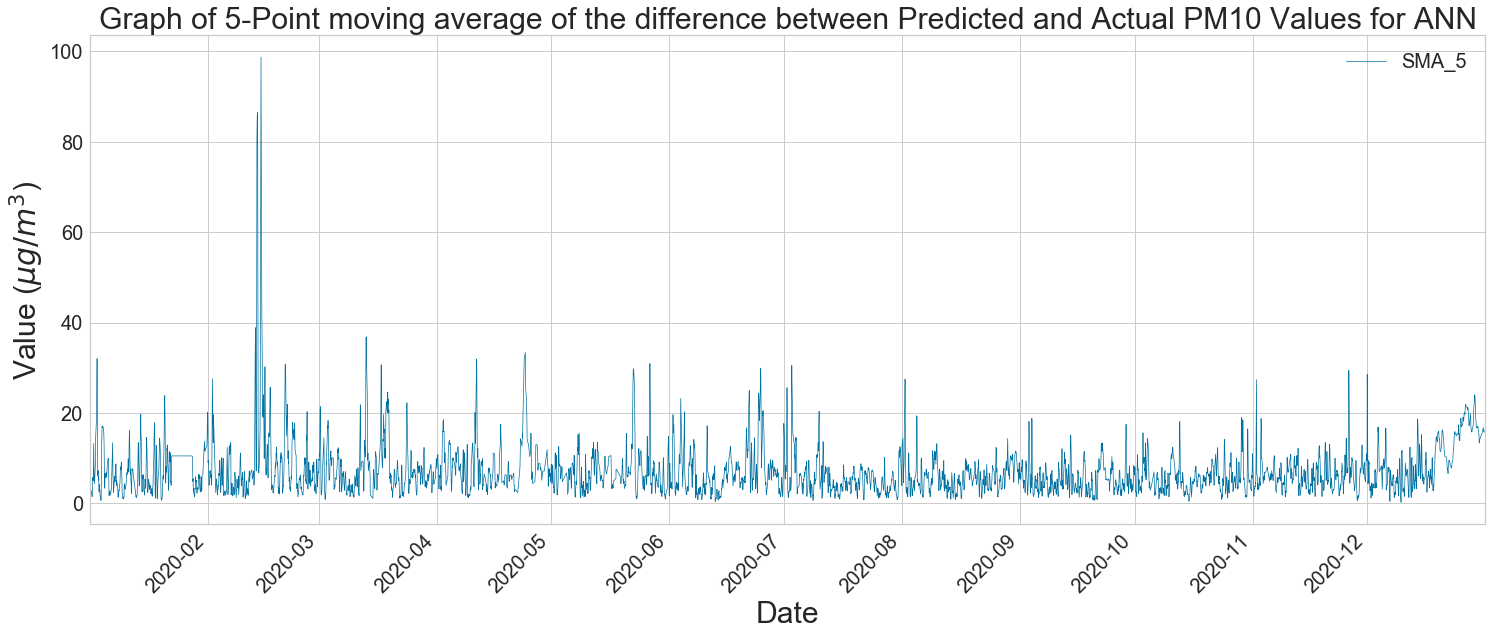

In [40]:
PredictionPlot('ANN', MLPPredPM, DYear2020)
MLPDiff = DiffPredictionPlot('ANN', MLPPredPM, DYear2020)

<Figure size 1800x720 with 0 Axes>

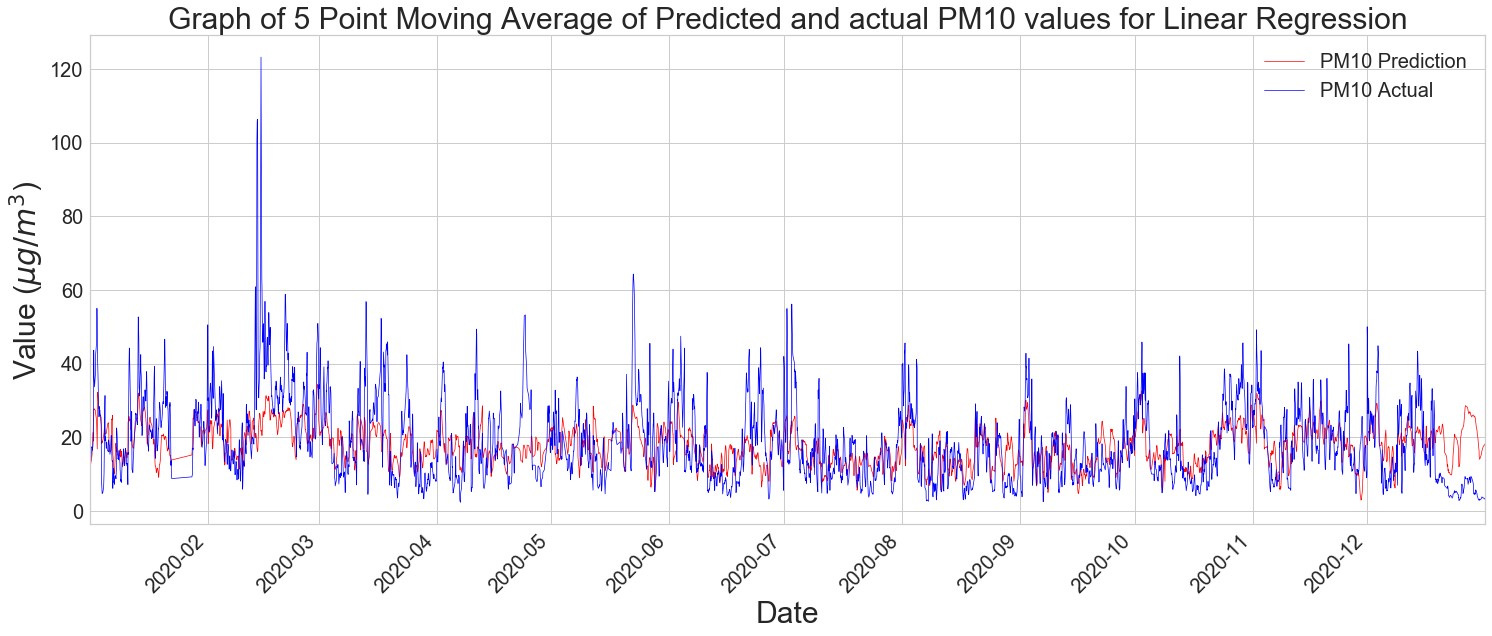

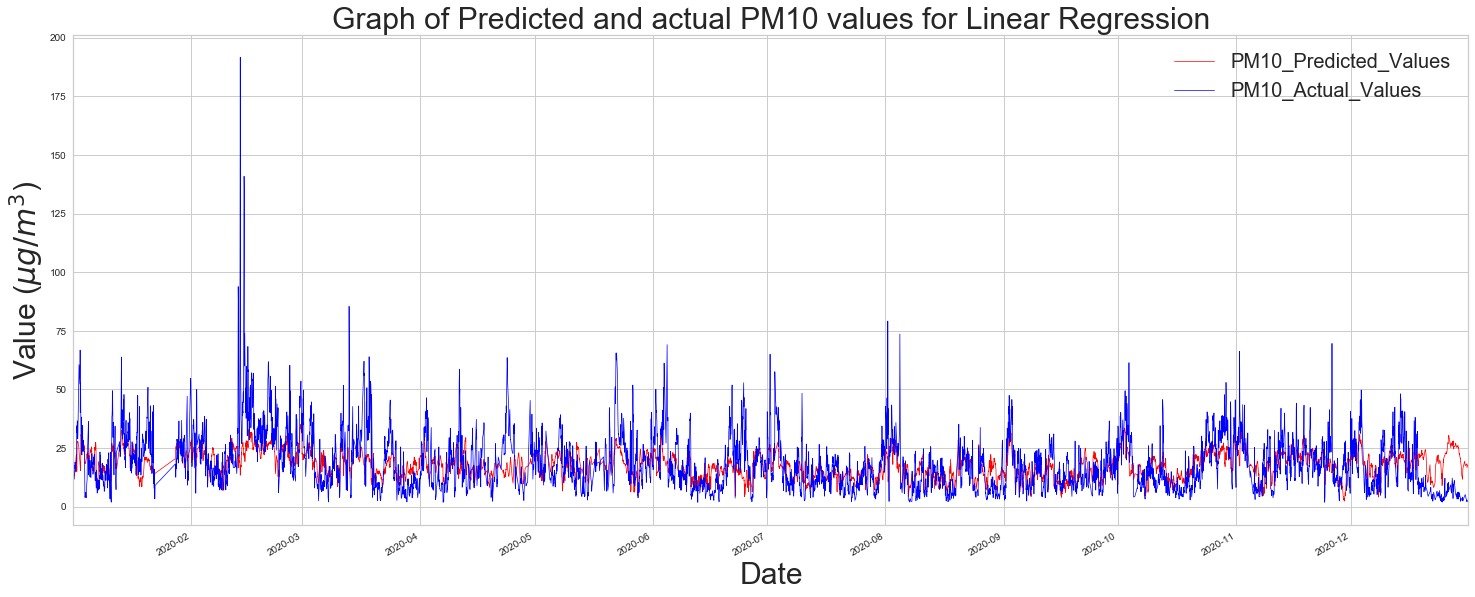

<Figure size 1800x720 with 0 Axes>

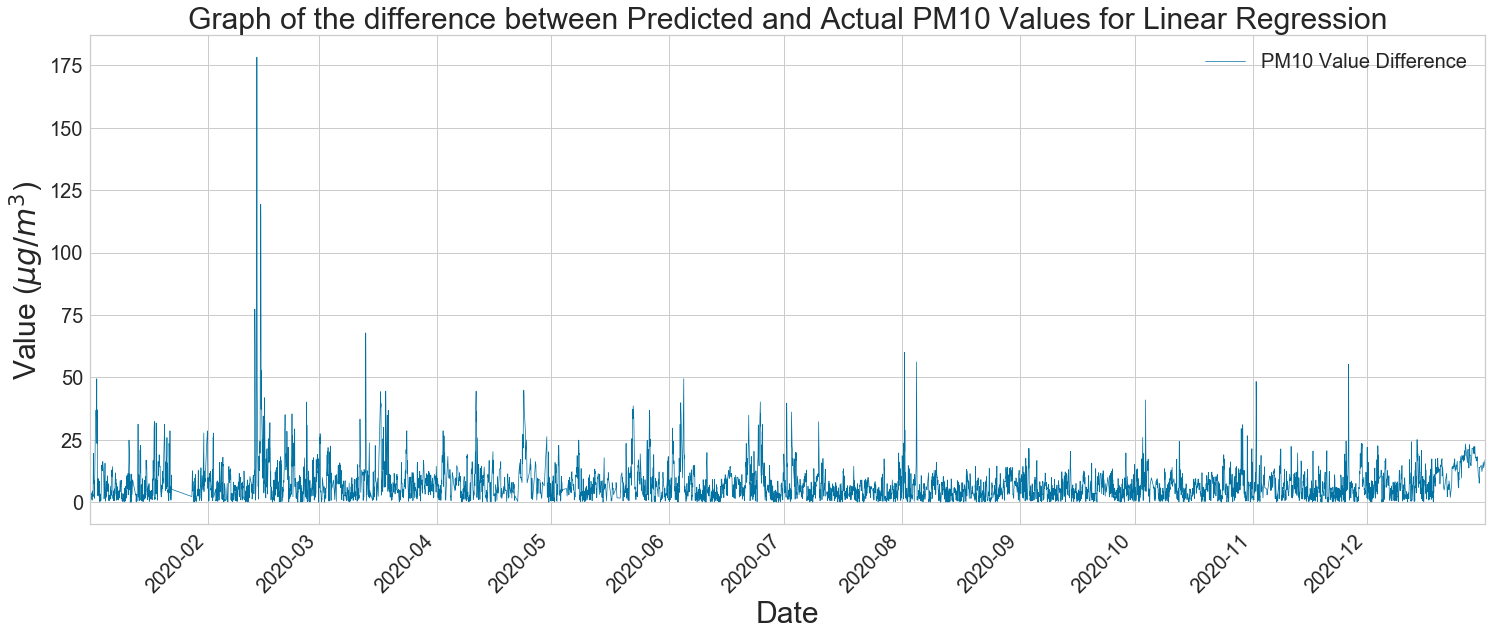

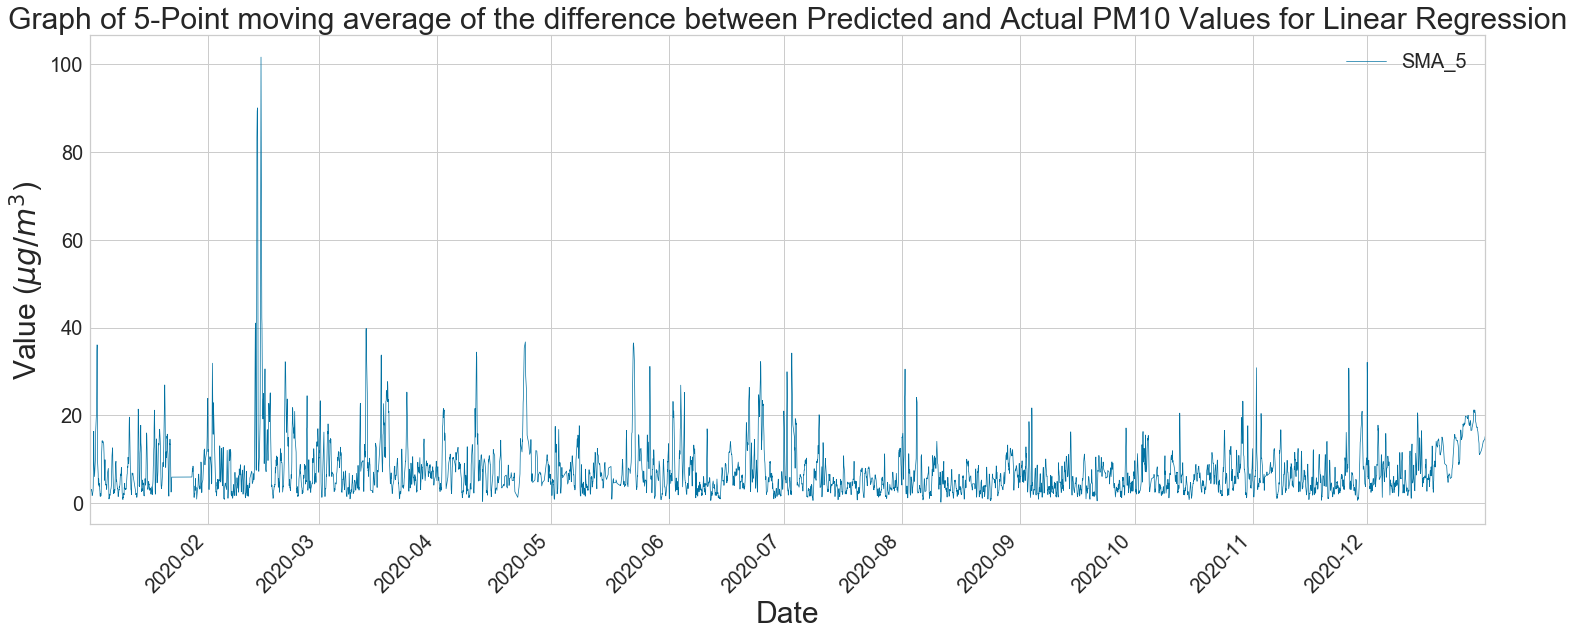

In [41]:
PredictionPlot('Linear Regression', LRPredPM, DYear2020)
LRDiff = DiffPredictionPlot('Linear Regression', LRPredPM, DYear2020)

<Figure size 1800x720 with 0 Axes>

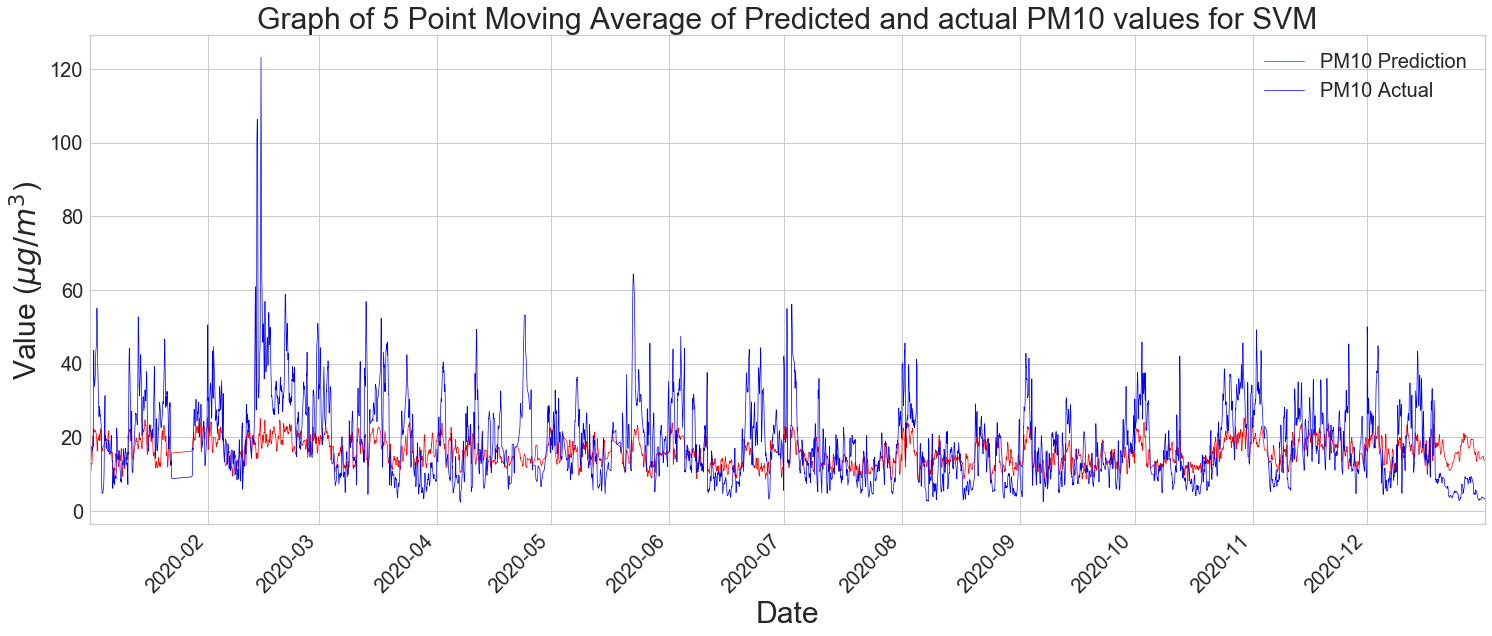

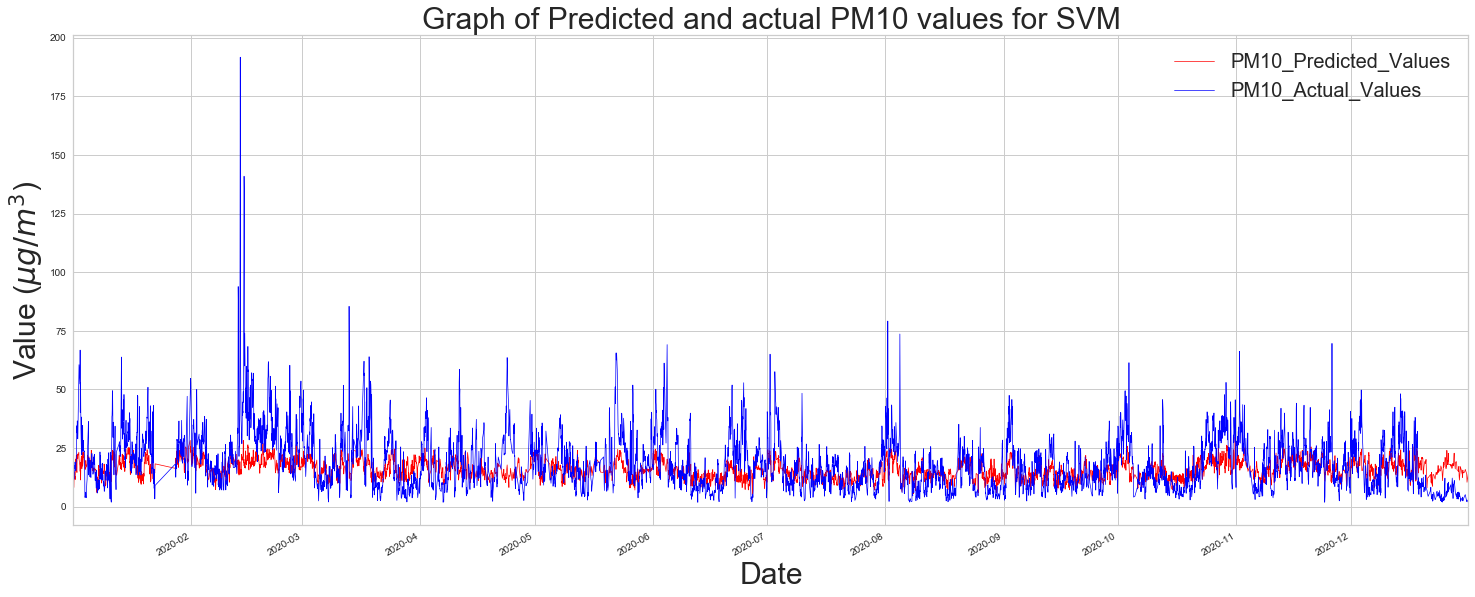

<Figure size 1800x720 with 0 Axes>

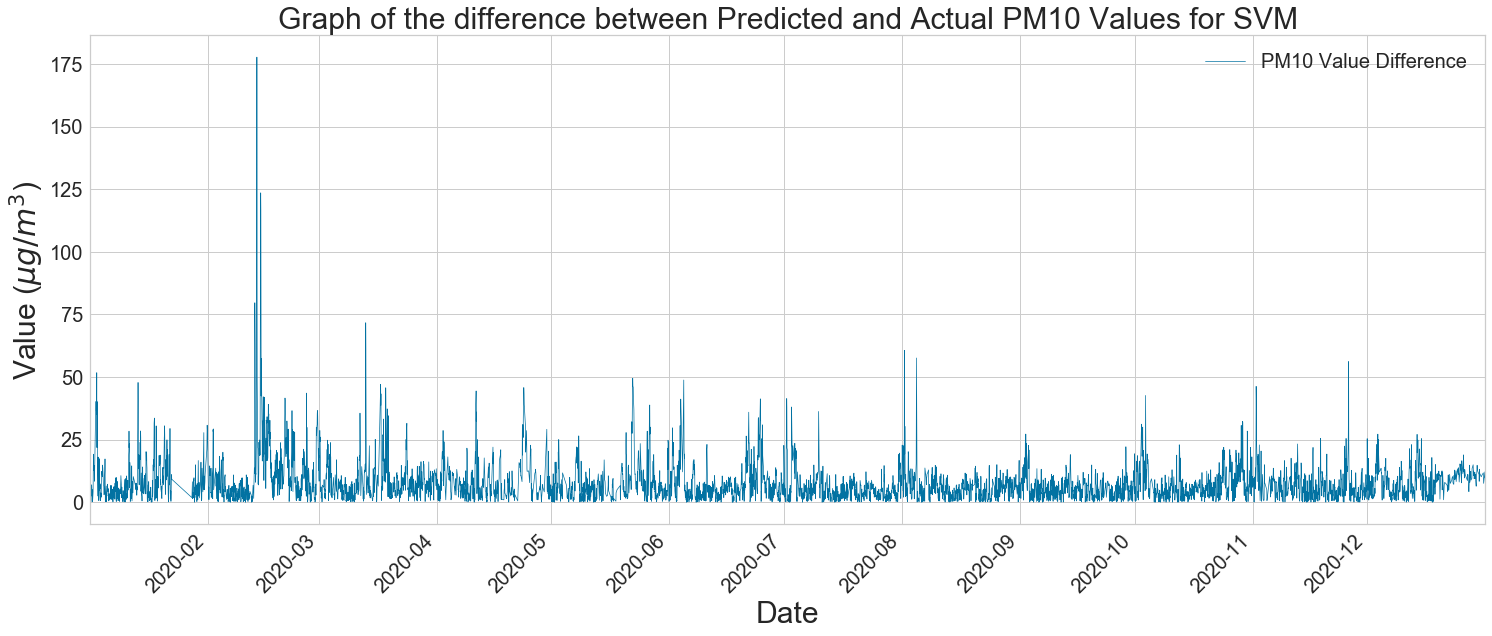

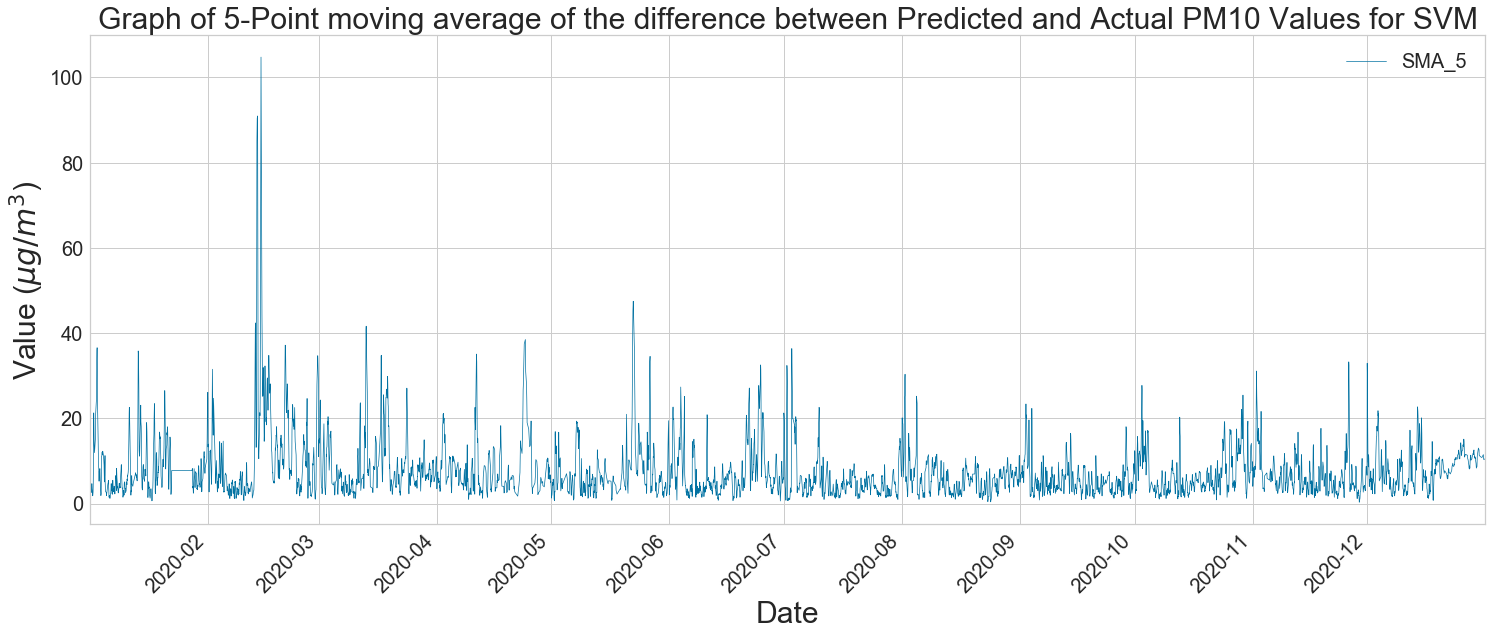

In [42]:
PredictionPlot('SVM', SVMPredPM, DYear2020)
SVMDiff = DiffPredictionPlot('SVM', SVMPredPM, DYear2020)

# Display Statistics for each Algorithm

In [44]:
Differences = pd.concat([RFDiff, GBDiff, MLPDiff, LRDiff, SVMDiff])

display(Differences)

,Algorithm,Max Difference,Min Difference
0,Random Forest,163.227000,0.001000
0,Gradient Boosting,155.455000,0.001000
0,ANN,170.444178,0.005297
0,Linear Regression,178.296526,0.003602
0,SVM,177.728867,0.001701


In [46]:
Predictions2020 = pd.concat([RFStatPM, GBStatPM, MLPStatPM, LRStatPM, SVMStatPM])


display(Predictions2020)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Algorithm,MAE,ME,MEAE,MSE,Max Depth,N Features,PM10 > 70 Removed,R2,Test-Train Split,Year
0,Random Forest,6.595393,176.124131,4.847961,95.176404,12.0,7,YES,0.330215,0.3,2020 Prediction
0,Gradient Boosting,6.756587,169.535400,5.074899,97.912316,12.0,7,YES,0.310961,0.3,2020 Prediction
0,ANN,6.564387,162.104146,4.841012,93.277727,NaN,7,YES,0.343576,0.3,2020 Prediction
0,Linear Regression,7.422642,179.297162,5.765282,112.498259,NaN,7,YES,0.208316,0.3,2020 Prediction
0,SVM,6.536907,171.635801,4.488258,99.712882,NaN,7,YES,0.298290,0.3,2020 Prediction
